In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [12]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [13]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [14]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    return np.sum((y - tx@w)**2)

In [15]:
w = np.array([1, 2])
compute_loss(y, tx, w)

np.float64(53889667.317741685)

# 2. Grid Search

Fill in the function `grid_search()` below:

In [16]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i in range(grid_w0.shape[0]):
        for j in range(grid_w1.shape[0]):
            losses[i, j] = compute_loss(y, tx, np.array([grid_w0[i], grid_w1[j]]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=375870.82039046474, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.067 seconds


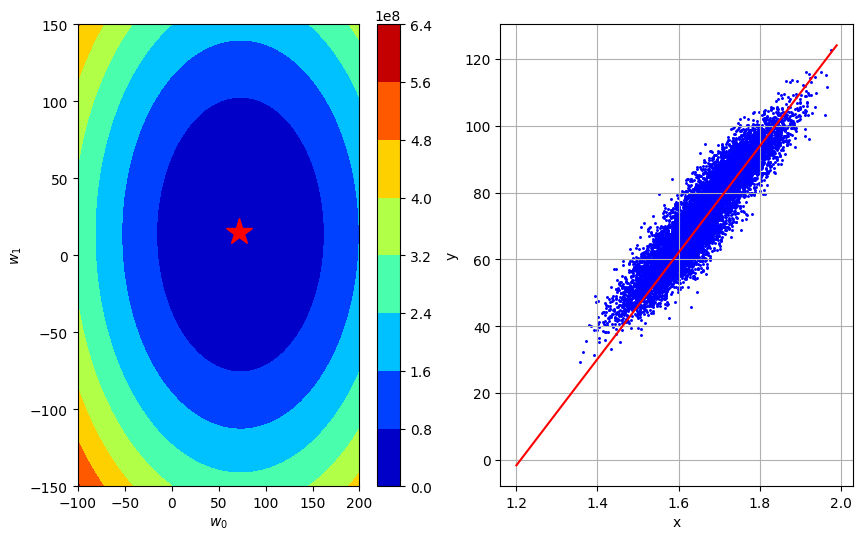

In [17]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [18]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    return -1*np.dot(tx.T, (y - tx@w))/y.shape[0]

Please fill in the functions `gradient_descent` below:

In [19]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        w = w - gamma*gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [20]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=55844734.25518335, w0=51.30574540147367, w1=9.43579870449228
GD iter. 1/49: loss=5306049.242179183, w0=66.69746902191577, w1=12.266538315840014
GD iter. 2/49: loss=757567.5910088175, w0=71.31498610804836, w1=13.115760199244336
GD iter. 3/49: loss=348204.2424034888, w0=72.70024123388815, w1=13.370526764265634
GD iter. 4/49: loss=311361.541029009, w0=73.11581777164008, w1=13.446956733772023
GD iter. 5/49: loss=308045.6979053059, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=307747.2720241726, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=307720.4136948706, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=307717.99644523347, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=307717.7788927661, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=307717.759313044, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=307717.7575508691, w0=73.29388305071, w1=13.479705271317192
GD iter. 1

In [21]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [22]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    return -1*np.dot(tx.T, (y - tx@w))/y.shape[0]


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        w = w - gamma*gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [23]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=55844734.25518335, w0=7.329392200210525, w1=1.3479712434988973
SGD iter. 1/49: loss=45292701.12060005, w0=13.925845180399984, w1=2.561145362647906
SGD iter. 2/49: loss=36745554.28158761, w0=19.862652862570528, w1=3.6530020698820116
SGD iter. 3/49: loss=29822365.341987487, w0=25.205779776523993, w1=4.635673106392706
SGD iter. 4/49: loss=24214582.30091142, w0=30.014593999082102, w1=5.520077039252338
SGD iter. 5/49: loss=19672278.03763981, w0=34.34252679938441, w1=6.316040578826
SGD iter. 6/49: loss=15993011.5843898, w0=38.2376663196565, w1=7.0324077644423
SGD iter. 7/49: loss=13012805.757257283, w0=41.743291887901364, w1=7.677138231496971
SGD iter. 8/49: loss=10598839.037279954, w0=44.898354899321745, w1=8.25739565184618
SGD iter. 9/49: loss=8643525.994098315, w0=47.73791160960009, w1=8.779627330160464
SGD iter. 10/49: loss=7059722.429121188, w0=50.29351264885061, w1=9.249635840643322
SGD iter. 11/49: loss=5776841.541489709, w0=52.593553584176064, w1=9.67264350007789

In [24]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [29]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [30]:
y.shape, tx.shape

((200,), (200, 2))

In [31]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=1131708.8897753665, w0=51.542590721811806, w1=10.132993413506094
SGD iter. 1/49: loss=106820.01035117678, w0=67.00536793835533, w1=13.17289143755783
SGD iter. 2/49: loss=14580.011203000104, w0=71.64420110331838, w1=14.084860844773326
SGD iter. 3/49: loss=6278.411279664253, w0=73.03585105280729, w1=14.358451666937965
SGD iter. 4/49: loss=5531.267286564031, w0=73.45334603765397, w1=14.440528913587356
SGD iter. 5/49: loss=5464.024327185009, w0=73.57859453310797, w1=14.46515208758217
SGD iter. 6/49: loss=5457.972460840897, w0=73.61616908174418, w1=14.472539039780616
SGD iter. 7/49: loss=5457.427792869927, w0=73.62744144633503, w1=14.474755125440149
SGD iter. 8/49: loss=5457.378772752541, w0=73.63082315571229, w1=14.47541995113801
SGD iter. 9/49: loss=5457.374360941976, w0=73.63183766852546, w1=14.475619398847368
SGD iter. 10/49: loss=5457.373963879024, w0=73.63214202236942, w1=14.475679233160175
SGD iter. 11/49: loss=5457.373928143359, w0=73.6322333285226, w1=14.475697

In [28]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [77]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    e = y - tx@w
    mae_term = np.zeros((y.shape[0], 1))
    mae_term[e > 0.0] = 1.0
    mae_term[e < 0.0] = -1.0
    # mae_term[e == 0.0] = 1.0
    mae_term = mae_term.reshape((1, y.shape[0]))/y.shape[0]
    return (-mae_term@tx).T[:, 0]

In [78]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = np.sum(np.abs(y - tx@w))
        gradient = compute_subgradient_mae(y, tx, w)
        w = w - gamma*gradient
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [79]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=14726.454491946228, w0=0.7000000000000004, w1=1.6830287163926981e-15
SubGD iter. 1/499: loss=14586.454491946228, w0=1.4000000000000008, w1=3.3660574327853962e-15
SubGD iter. 2/499: loss=14446.454491946228, w0=2.1000000000000014, w1=5.0490861491780946e-15
SubGD iter. 3/499: loss=14306.454491946228, w0=2.8000000000000016, w1=6.7321148655707925e-15
SubGD iter. 4/499: loss=14166.45449194623, w0=3.5000000000000018, w1=8.415143581963491e-15
SubGD iter. 5/499: loss=14026.454491946228, w0=4.200000000000002, w1=1.0098172298356189e-14
SubGD iter. 6/499: loss=13886.454491946228, w0=4.900000000000002, w1=1.1781201014748887e-14
SubGD iter. 7/499: loss=13746.45449194623, w0=5.600000000000002, w1=1.3464229731141585e-14
SubGD iter. 8/499: loss=13606.45449194623, w0=6.3000000000000025, w1=1.5147258447534283e-14
SubGD iter. 9/499: loss=13466.45449194623, w0=7.000000000000003, w1=1.6830287163926982e-14
SubGD iter. 10/499: loss=13326.45449194623, w0=7.700000000000003, w1=1.85133158

In [80]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [70]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        loss = np.sum(np.abs(y - tx@w))
        gradient = compute_subgradient_mae(y, tx, w)
        w = w - gamma*gradient
        ws.append(w)
        losses.append(loss)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [71]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=14726.454491946228, w0=0.7000000000000004, w1=1.6830287163926981e-15
SubSGD iter. 1/499: loss=14586.454491946228, w0=1.4000000000000008, w1=3.3660574327853962e-15
SubSGD iter. 2/499: loss=14446.454491946228, w0=2.1000000000000014, w1=5.0490861491780946e-15
SubSGD iter. 3/499: loss=14306.454491946228, w0=2.8000000000000016, w1=6.7321148655707925e-15
SubSGD iter. 4/499: loss=14166.45449194623, w0=3.5000000000000018, w1=8.415143581963491e-15
SubSGD iter. 5/499: loss=14026.454491946228, w0=4.200000000000002, w1=1.0098172298356189e-14
SubSGD iter. 6/499: loss=13886.454491946228, w0=4.900000000000002, w1=1.1781201014748887e-14
SubSGD iter. 7/499: loss=13746.45449194623, w0=5.600000000000002, w1=1.3464229731141585e-14
SubSGD iter. 8/499: loss=13606.45449194623, w0=6.3000000000000025, w1=1.5147258447534283e-14
SubSGD iter. 9/499: loss=13466.45449194623, w0=7.000000000000003, w1=1.6830287163926982e-14
SubSGD iter. 10/499: loss=13326.45449194623, w0=7.700000000000003, w1

In [72]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>